In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import cv2
import os

# Exploratory Data Analysis (EDA)

In [3]:
# Read the dataset
ROOT_DATASET_DIR = "isic-2024-challenge"
image_path=os.path.join(ROOT_DATASET_DIR,"train-image","image")
file_name = os.path.join(ROOT_DATASET_DIR,"train-metadata.csv")
df_raw = pd.read_csv(file_name)

C:\Users\ssre_\AppData\Local\Temp\ipykernel_19492\2115664802.py:5: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(file_name)


In [4]:
# Analyze de features
df_raw.head(5)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


55 features in total.

In [33]:
stats = df_raw.describe()
stats

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [34]:
NumSamples = df_raw.shape[0]
NumFeatures = df_raw.shape[1]
print(f"Number of samples: {NumSamples}")
print(f"Number of features: {NumFeatures}")

Number of samples: 401059
Number of features: 55


### Columns included in train-metadata
| Feature | Description | To Be Removed | Comments |
| ----- | ----- | ----- | ----- | 
|``target``| Binary class {0: benign, 1: malignant}.| No | **Classification label** |
|``lesion_id``| Unique lesion identifier. Present in lesions that were manually tagged as a lesion of interest.| **Yes** | |
|``iddx_full``|	Fully classified lesion diagnosis.| **Yes** | |
|``iddx_1``| First level lesion diagnosis.| **Yes** | |
|``iddx_2``| Second level lesion diagnosis.| **Yes** | |
|``iddx_3``| Third level lesion diagnosis.| **Yes** | |
|``iddx_4``| Fourth level lesion diagnosis.| **Yes** | |
|``iddx_5``| Fifth level lesion diagnosis.| **Yes** | |
|``mel_mitotic_index``|	Mitotic index of invasive malignant melanomas.| **Yes** | |
|``mel_thick_mm``|	Thickness in depth of melanoma invasion.| **Yes** | |
|``tbp_lv_dnn_lesion_confidence``|	Lesion confidence score (0-100 scale).+| **Yes** | |

### Columns included in both training and test-metadata
| Feature | Description | To Be Removed | Comments |
| ----- | ----- | ----- | ----- | 
|``isic_id``| Unique case identifier. | **Yes\*** | **\*Image file name, to be removed after EDA** |
|``patient_id``| Unique patient identifier. | **Yes** | |
|``age_approx``| Approximate age of patient at time of imaging. | No | Numerical |
|``sex``| Sex of the person. | No | **Numerical - to be converted to Categorial?** |
|``anatom_site_general``| Location of the lesion on the patient's body.  | No | **5-label categorical - OneHotEnc?** |
|``clin_size_long_diam_mm``| Maximum diameter of the lesion (mm).+  | No | **Numerical, checkout histogram, maybe it is skewed** |
|``image_type``| Structured field of the ISIC Archive for image type.  | **Yes** |
|``tbp_tile_type``|	Lighting modality of the 3D TBP source image. | No | **Modify to boolean** | 
|``tbp_lv_A``| A inside lesion.+ | No | **Numerical, checkout histogram** |
|``tbp_lv_Aex``| A outside lesion.+ | No | **Numerical, checkout histogram** |
|``tbp_lv_B``| B inside lesion.+ | No | **Numerical, checkout histogram** |
|``tbp_lv_Bext``| B outside lesion.+ | No | **Numerical, checkout histogram** |
|``tbp_lv_C``| Chroma inside lesion.+ | No | **Numerical, checkout histogram** |
|``tbp_lv_Cext``| Chroma outside lesion.+ | No | **Numerical, checkout histogram** |
|``tbp_lv_H``| Hue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown).+ | No | **Numerical, checkout histogram** |
|``tbp_lv_Hext``| Hue outside lesion.+ | No | **Numerical, checkout histogram** |
|``tbp_lv_L``| L inside lesion.+ | No | **Numerical, checkout histogram** |
|``tbp_lv_Lext``| L outside lesion.+ | No | **Numerical, checkout histogram** |
|``tbp_lv_areaMM2``| Area of lesion (mm^2).+ | No | **Numerical, checkout histogram** |
|``tbp_lv_area_perim_ratio``|	Border jaggedness, the ratio between lesions perimeter and area. Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10.+ | No | |
|``tbp_lv_color_std_mean``|	Color irregularity, calculated as the variance of colors within the lesion's boundary. | No | |
|``tbp_lv_deltaA``|	Average A contrast (inside vs. outside lesion).+ | No | |
|``tbp_lv_deltaB``|	Average B contrast (inside vs. outside lesion).+ | No | |
|``tbp_lv_deltaL``|	Average L contrast (inside vs. outside lesion).+ | No | |
|``tbp_lv_deltaLBnorm``| Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles; high contrast lesions tend to be those with darker pigment. Calculated as the average delta LB of the lesion relative to its immediate background in LAB* color space. Typical values range from 5.5 to 25.+ | No | |
|``tbp_lv_eccentricity``| Eccentricity.+ | No | |
|``tbp_lv_location``| Classification of anatomical location, divides arms & legs to upper & lower; torso into thirds.+ | No | |
|``tbp_lv_location_simple``| Classification of anatomical location, simple.+ | No | |
|``tbp_lv_minorAxisMM``| Smallest lesion diameter (mm).+ | No | |
|``tbp_lv_nevi_confidence``| Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist.+,++ | No | |
|``tbp_lv_norm_border``| Border irregularity (0-10 scale); the normalized average of border jaggedness and asymmetry.+ | No | |
|``tbp_lv_norm_color``|	Color variation (0-10 scale); the normalized average of color asymmetry and color irregularity.+ | No | |
|``tbp_lv_perimeterMM``| Perimeter of lesion (mm).+ | No | |
|``tbp_lv_radial_color_std_max``| Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in LAB* color space within concentric rings originating from the lesion center. Values range 0-10.+ | No | |
|``tbp_lv_stdL``| Standard deviation of L inside lesion.+ | No | |
|``tbp_lv_stdLExt``| Standard deviation of L outside lesion.+ | No | |
|``tbp_lv_symm_2axis``|	Border asymmetry; a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis. Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation. The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10.+ | No | |
|``tbp_lv_symm_2axis_angle``|	Lesion border asymmetry angle.+ | No | |
|``tbp_lv_x``|	X-coordinate of the lesion on 3D TBP.+ | No | |
|``tbp_lv_y``|	Y-coordinate of the lesion on 3D TBP.+ | No | |
|``tbp_lv_z	``| Z-coordinate of the lesion on 3D TBP.+ | No | |
|``attribution``|	Image attribution, synonymous with image source. | No | |
|``copyright_license``|	Copyright license. | **Yes** | |

In [35]:
df_raw.tbp_lv_areaMM2.value_counts()

tbp_lv_areaMM2
3.996998      763
4.203415      745
4.428598      729
3.846876      726
3.790580      722
             ... 
111.859600      1
64.195909       1
97.785701       1
43.422780       1
134.077700      1
Name: count, Length: 8029, dtype: int64

In [69]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

### Imbalance analysis

target
0    400666
1       393
Name: count, dtype: int64


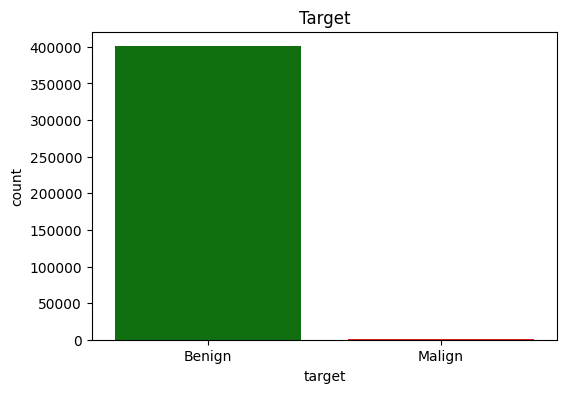

In [120]:
targets = df_raw.target.value_counts()
print(targets)

fig, ax = plt.subplots(figsize=(6,4))
plt.title('Target')
sns.countplot(data=df_raw, x='target', hue='target', palette=['green', 'red'], ax=ax)
ax.legend_.remove()
ax.set_xticks([0, 1])
ax.set_xticklabels(['Benign', 'Malign'])
plt.show()

The database is extremely imbalanced. There are much more benign cases than malign cases.

### Image size analysis for image scaling

In [52]:
# Method to determine the width or height of the images. Default is height (dim=0)
def get_size(file_name, dim=0):
    im = cv2.imread(file_name)
    if im is not None:
        if dim == 0:
            return im.shape[0]
        else:
            return im.shape[1]
    else:
        return None

df_raw['im_height'] = df_raw['isic_id'].apply(lambda x: get_size(os.path.join(image_path, x + ".jpg")))

In [105]:
# See the stats for the image size
print(df_raw.describe()['im_height'].round())
print("")
print(f"Mean:   {df_raw['im_height'].mean().round().astype(int)}")
print(f"Mode:   {df_raw['im_height'].mode()[0].round().astype(int)}")
print(f"Median: {df_raw['im_height'].median().round().astype(int)}")

count    401059.0
mean        133.0
std          18.0
min          41.0
25%         121.0
50%         131.0
75%         143.0
max         269.0
Name: im_height, dtype: float64

Mean:   133
Mode:   133
Median: 131


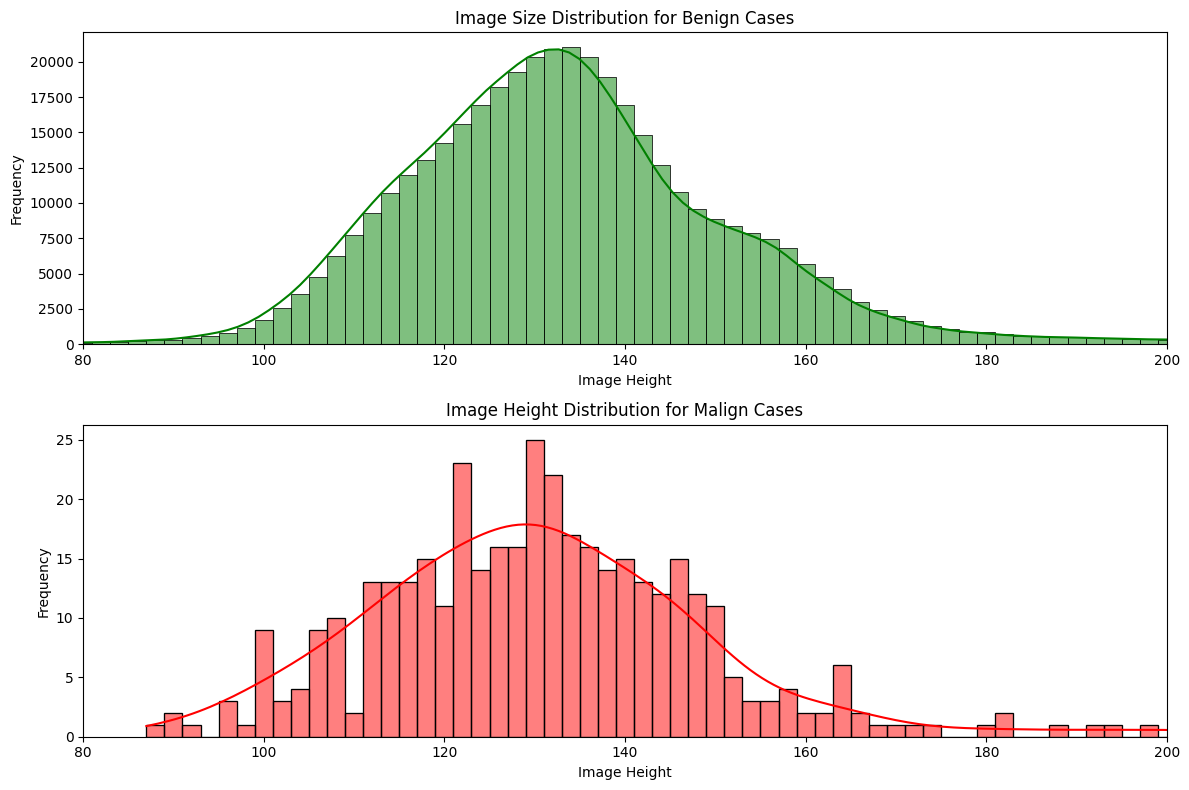

In [106]:
#Plot the image size distributions
fig = plt.figure(figsize=(12, 8))

# Subplot for benign cases
ax = fig.add_subplot(211)
ax.set_title('Image Size Distribution for Benign Cases')
sns.histplot(df_raw[df_raw.target == 0], x='im_height', binwidth=2, kde=True, ax=ax, color='green')
ax.set_xlabel('Image Height')
ax.set_ylabel('Frequency')

# Subplot for malignant cases
ax2 = fig.add_subplot(212)
ax2.set_title('Image Height Distribution for Malign Cases')
sns.histplot(df_raw[df_raw.target == 1], x='im_height', binwidth=2, kde=True, ax=ax2, color='red')
ax2.set_xlabel('Image Height')
ax2.set_ylabel('Frequency')

# Set the same x-axis range for both plots
#xmin = df_raw['im_height'].min()
#xmax = df_raw['im_height'].max()
ax.set_xlim(80, 200)
ax2.set_xlim(80, 200)

plt.tight_layout()
plt.show()

The most frequent values are around 133. This means that we can scale the training images to 133x133 pixels. We can however scale then to **128x128** pixels, as it more typical for image processing.

### Analysis of malign cases

In [73]:
df_malign = df_raw[df_raw.target == 1]

In [74]:
df_malign.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,393.0,390.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,...,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,63.000000,393.000000
mean,1.0,61.371795,5.749771,22.500924,17.534401,23.837896,24.950406,33.067349,30.796881,46.741528,...,1.613218,3.418305,2.758215,0.317134,87.786260,-19.793436,1169.483517,33.644145,0.670952,81.431493
std,0.0,11.932877,3.902299,6.028313,4.994446,5.796078,4.496718,7.139618,5.162160,7.649197,...,1.402347,2.547976,1.272302,0.136708,53.357287,175.384598,434.909694,94.172638,0.792798,33.805649
min,1.0,20.000000,1.010000,4.971736,4.826737,2.870907,12.637140,7.715667,17.381603,7.174666,...,0.000000,0.490105,1.112039,0.076033,0.000000,-499.481934,25.816711,-218.200900,0.200000,0.000002
25%,1.0,55.000000,2.400000,18.829265,14.102340,20.117431,21.941560,28.885180,27.151434,41.682590,...,0.257916,1.441946,2.069338,0.209040,40.000000,-120.321200,1069.546000,-35.567630,0.300000,83.221790
50%,1.0,60.000000,5.140000,21.990980,16.877089,24.043740,25.077617,33.446362,31.005119,47.277889,...,1.475259,2.724339,2.534622,0.303571,90.000000,-22.899292,1286.181000,35.604858,0.400000,99.684890
75%,1.0,70.000000,7.870000,25.872050,20.416961,27.808540,27.976310,37.535360,34.245000,52.122260,...,2.414190,4.635533,3.032155,0.400000,135.000000,75.480410,1477.038086,110.856689,0.600000,99.995804
max,1.0,85.000000,18.940000,43.717670,35.867190,44.625461,42.718264,53.569388,47.263349,65.258690,...,7.020391,14.004394,15.733160,0.767033,175.000000,467.847500,1864.878662,220.518600,5.000000,100.000000


In [79]:
df_raw.isna().sum()

isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           

In [80]:
df_malign.isna().sum()

isic_id                           0
target                            0
patient_id                        0
age_approx                        3
sex                              10
anatom_site_general               0
clin_size_long_diam_mm            0
image_type                        0
tbp_tile_type                     0
tbp_lv_A                          0
tbp_lv_Aext                       0
tbp_lv_B                          0
tbp_lv_Bext                       0
tbp_lv_C                          0
tbp_lv_Cext                       0
tbp_lv_H                          0
tbp_lv_Hext                       0
tbp_lv_L                          0
tbp_lv_Lext                       0
tbp_lv_areaMM2                    0
tbp_lv_area_perim_ratio           0
tbp_lv_color_std_mean             0
tbp_lv_deltaA                     0
tbp_lv_deltaB                     0
tbp_lv_deltaL                     0
tbp_lv_deltaLB                    0
tbp_lv_deltaLBnorm                0
tbp_lv_eccentricity         

All images labeled as malign have a lesson_id, iddx_1, iddx_2, iddx_3. Half of them has iddx_4

# ToDo:

# Sergio to do basic EDA
# Contact Jens for a meeting on Aug. 13
# Dimitra